In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf
import cv2
import shutil

2024-04-03 15:25:47.960139: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 15:25:47.960248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 15:25:48.101742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
shutil.copyfile('/kaggle/input/02-object-detection/best_model.keras', 'best_model.keras')

'best_model.keras'

In [3]:
model = load_model('best_model.keras')

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 990 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [4]:
path = '/kaggle/input/car-plates-numbers/Car Plates Numbers/egyptnumberplates_355459229_598783515430459_8118864371795960238_n.jpg'
image = load_img(path=path)
image = np.array(image,dtype=np.uint8) 

image1 = load_img(path=path, target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 

(-0.5, 1079.5, 1079.5, -0.5)

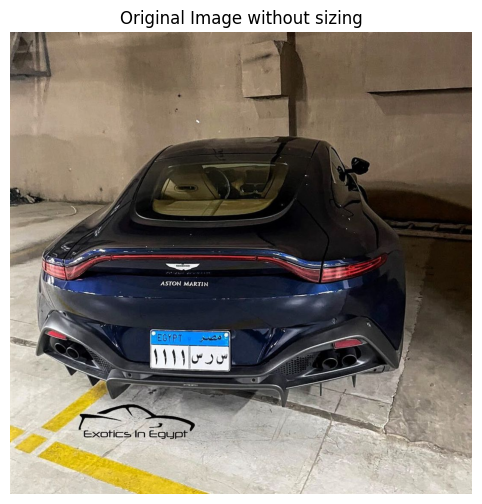

In [5]:
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.title("Original Image without sizing")
plt.axis("off")

In [6]:
image_arr_224.shape


(224, 224, 3)

In [7]:
# reshaping
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [8]:
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


I0000 00:00:1712158037.977281      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[0.3008253 , 0.4833718 , 0.6525481 , 0.73878926]], dtype=float32)

In [9]:
h,w,d = image.shape
denorm = np.array([w,w,h,h])
coords = coords * denorm

coords ,denorm 

(array([[324.89132166, 522.04153776, 704.7519207 , 797.89240122]]),
 array([1080, 1080, 1080, 1080]))

In [10]:
coords = coords.astype(np.int32)
coords

array([[324, 522, 704, 797]], dtype=int32)

(324, 704) (522, 797)


(-0.5, 1079.5, 1079.5, -0.5)

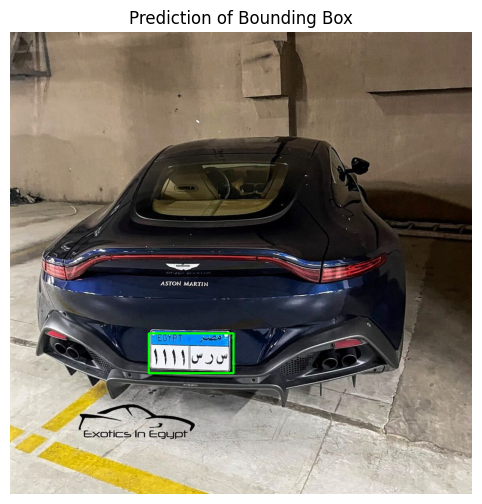

In [11]:
xmin, xmax, ymin, ymax = coords[0]

pt1 = (xmin, ymin)
pt2 = (xmax, ymax)

print(pt1, pt2)

cv2.rectangle(image, pt1, pt2, (0,255,0), 3)

plt.figure(figsize=(8,6))
plt.imshow(image)
plt.title("Prediction of Bounding Box")
plt.axis("off")

In [12]:
def object_detection(file_path):
    #read Images
    image = load_img(path=file_path)
    image = np.array(image,dtype=np.uint8) 

    image1 = load_img(path=file_path, target_size=(224,224))
    image_arr_224 = img_to_array(image1)/255.0 
    
    # reshaping
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    #prediction
    coords = model.predict(test_arr)
    
    #denormalize
    h,w,d = image.shape
    denorm = np.array([w,w,h,h])
    coords = coords * denorm

    #to int
    coords = coords.astype(np.int32)
    
    #draw rectangle 
    xmin, xmax, ymin, ymax = coords[0]

    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)

    print(pt1, pt2)

    cv2.rectangle(image, pt1, pt2, (0,255,0), 3)

    return image , coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
(445, 782) (625, 863)


(-0.5, 1033.5, 1292.5, -0.5)

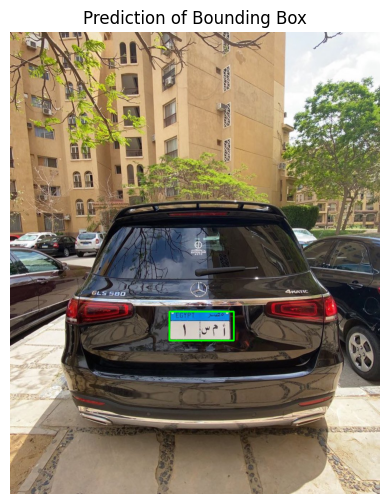

In [13]:
img,coords = object_detection(file_path="/kaggle/input/car-plates-numbers/Car Plates Numbers/egyptnumberplates_355637128_9513984898675378_8555948541174841766_n.jpg")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
(486, 461) (656, 549)


(-0.5, 1079.5, 1079.5, -0.5)

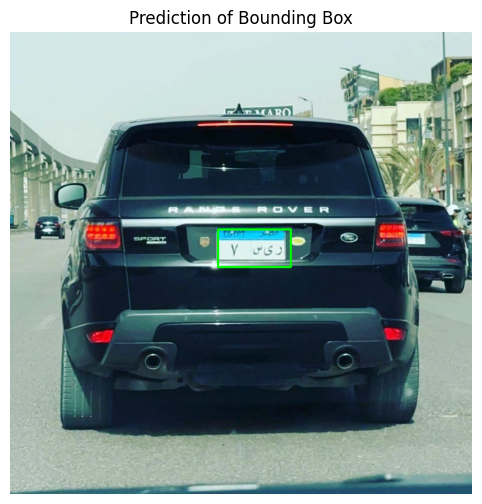

In [14]:
img,coords = object_detection(file_path="/kaggle/input/car-plates-numbers/Car Plates Numbers/egyptnumberplates_355661499_308951541461965_6954841077514075924_n.jpg")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(486, 461) (656, 549)


(-0.5, 1079.5, 1079.5, -0.5)

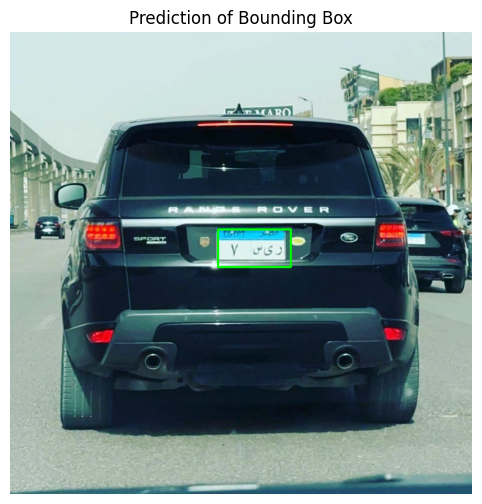

In [15]:
img,coords = object_detection(file_path="/kaggle/input/car-plates-numbers/Car Plates Numbers/egyptnumberplates_355661499_308951541461965_6954841077514075924_n.jpg")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
(104, 131) (168, 167)


(-0.5, 231.5, 216.5, -0.5)

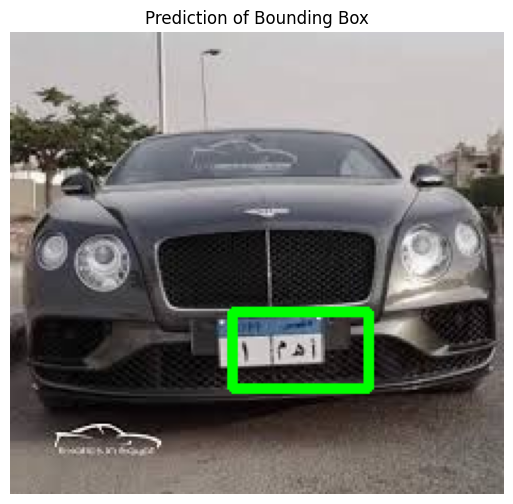

In [16]:
#Web images 
img,coords = object_detection(file_path="/kaggle/input/web-imagess/images.jpeg")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

In [17]:
import pytesseract as pt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
(353, 432) (547, 511)


(-0.5, 945.5, 807.5, -0.5)

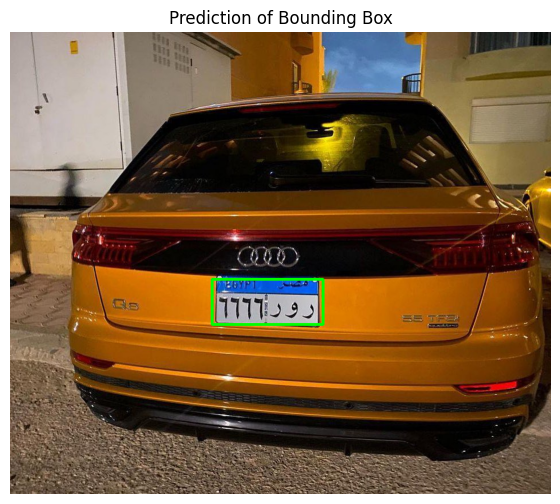

In [18]:
path="/kaggle/input/car-plates-numbers/Car Plates Numbers/egyptnumberplates_358540549_18299481844105703_3894067198622821882_n.jpg"

img,coords = object_detection(path)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

(-0.5, 193.5, 78.5, -0.5)

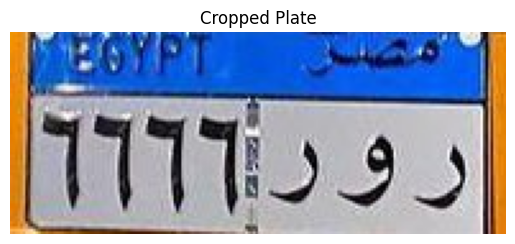

In [19]:
img = np.array(load_img(path))

xmin, xmax, ymin, ymax = coords[0]
roi = img[ymin:ymax, xmin:xmax]

plt.imshow(roi)
plt.title("Cropped Plate")
plt.axis("off")

In [20]:
image.shape

(1080, 1080, 3)

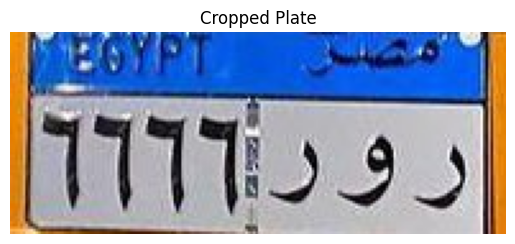

In [21]:
import cv2
import pytesseract

# Load the image using OpenCV
img = cv2.imread(path)

# Crop the region of interest (ROI)
xmin, xmax, ymin, ymax = coords[0]
roi = img[ymin:ymax, xmin:xmax]

# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Display the cropped plate and extracted text
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title("Cropped Plate")
plt.axis("off")
plt.show()


In [22]:
import cv2
import pytesseract
import os
import matplotlib.pyplot as plt
from requests import get

def download(url, file_name):
    response = get(url)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {file_name} successfully.")
    else:
        print(f"Failed to download {file_name}.")


download("https://github.com/tesseract-ocr/tessdata/raw/main/ara.traineddata", "ara.traineddata")

# Set TESSDATA_PREFIX environment variable
os.environ['TESSDATA_PREFIX'] = '.'

Downloaded ara.traineddata successfully.


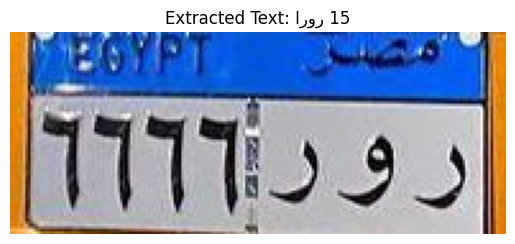

In [23]:
img = cv2.imread(path)

# Define the coordinates of the region of interest (ROI)
coords = [(xmin, xmax, ymin, ymax)]

xmin, xmax, ymin, ymax = coords[0]
roi = img[ymin:ymax, xmin:xmax]

# Convert ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Perform OCR on the grayscale ROI
extracted_text = pytesseract.image_to_string(gray_roi, lang='ara')

# Display the ROI with the extracted text
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title(f"Extracted Text: {extracted_text.strip()}")
plt.axis("off")
plt.show()

In [24]:
def extract_image(path):
    _,coords = object_detection(path) 
    img = cv2.imread(path)
    xmin, xmax, ymin, ymax = coords[0]
    roi = img[ymin:ymax, xmin:xmax]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    extracted_text = pytesseract.image_to_string(gray_roi, lang='ara')
    return roi, extracted_text

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(334, 430) (519, 532)


(-0.5, 184.5, 101.5, -0.5)

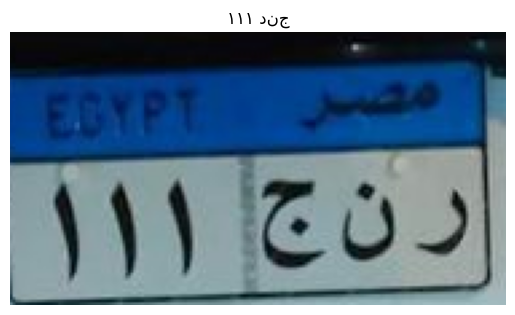

In [25]:
path="/kaggle/input/car-plates-numbers/Car Plates Numbers/egyptnumberplates_364116862_18304377439105703_3636696618764985238_n.jpg"

roi ,extracted_text = extract_image(path)

plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title(f'{extracted_text.strip()}')
plt.axis("off")